# 🧪 Synthetic Data Testing with CTGAN
This notebook loads your dataset, preprocesses it, trains a CTGAN model, generates synthetic data, and evaluates a model trained on synthetic vs. real data.

In [1]:
#  Install required packages
!pip install sdv==1.4.0 numpy==1.24.4 scikit-learn pandas

In [3]:
#  Import libraries
import pandas as pd
from sdv.single_table import CTGANSynthesizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
#  Load your CSV file
df = pd.read_csv("7. Working copy labs 10042025 with GP codes and distance to lab.csv")
df.head()

,Respondent sequence number,Date Sample Taken,Time Sample Taken,Date received into lab,Time received into lab,Date Result Reported,Time Result Reported,Apolipoprotein B g/L,Albumin g/dL,Albumin g/L,...,Triglyceride mmol/L,LDL cholesterol mmol/L,2 hour glucose OGTT mmol/L,Time from fasrt glucose and challenge (min),Time from fast glucose and OGTT (min),Time from glucose challenge and OGTT (min),Amount of glucose challenge drank,"Total length of 'food fast', hours","Total length of 'food fast', minutes",Total cholesterol mmol/L
0,73557,02/13/2023,06:22:00 PM,02/13/2023,06:22:00 PM,02/15/2023,09:18:00 AM,NaN,4.1,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.32
1,73558,02/09/2023,11:00:00 AM,02/09/2023,04:50:00 PM,02/10/2023,02:19:00 PM,NaN,4.7,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
2,73559,01/17/2023,09:45:00 AM,01/17/2023,03:56:00 PM,01/18/2023,03:31:00 PM,0.57,3.7,37,...,0.576,1.448,NaN,NaN,NaN,NaN,NaN,15,51,3.26
3,73560,01/11/2023,04:16:00 PM,01/11/2023,04:47:00 PM,01/12/2023,12:18:00 PM,NaN,4.3,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.34
4,73561,01/23/2023,12:44:00 PM,01/23/2023,02:01:00 PM,01/23/2023,03:26:00 PM,0.92,4.3,43,...,0.847,2.612,NaN,NaN,NaN,NaN,3,14,42,5.2


In [5]:
# Select useful numeric lab features and clean the data
features = [
    'Cholesterol mmol/L', 'Glucose, refridgerated serum mmol/L',
    'Triglycerides, refridgerated mmol/L', 'Haemoglobin (g/dL)',
    'White blood cell count (1000 cells/µL)',
    'Red Blood Cell Count (million cells/µL)',
    'Total cholesterol mmol/L'
]
df_subset = df[features].apply(pd.to_numeric, errors='coerce').dropna()

# Create a binary target column
df_subset['Target'] = (df_subset['Total cholesterol mmol/L'] > 5).astype(int)
df_subset.head()

,Cholesterol mmol/L,"Glucose, refridgerated serum mmol/L","Triglycerides, refridgerated mmol/L",Haemoglobin (g/dL),White blood cell count (1000 cells/µL),Red Blood Cell Count (million cells/µL),Total cholesterol mmol/L,Target
0,4.344,30.75,1.581,15.2,4.7,5.09,4.32,0
1,4.319,12.16,2.902,11.9,12.6,3.84,4.40,0
2,3.284,10.16,0.576,17.2,7.2,5.53,3.26,0
3,4.400,5.00,2.210,12.9,7.8,4.61,4.34,0
4,5.353,5.77,0.994,14.5,6.6,4.72,5.20,1


In [9]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

# Generate metadata from your dataframe
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_subset)

# Pass metadata to the model
ctgan = CTGANSynthesizer(metadata, epochs=100)

# Train
ctgan.fit(df_subset)

# Sample synthetic data
synthetic_data = ctgan.sample(5000)


In [10]:
synthetic_data.head()


,Cholesterol mmol/L,"Glucose, refridgerated serum mmol/L","Triglycerides, refridgerated mmol/L",Haemoglobin (g/dL),White blood cell count (1000 cells/µL),Red Blood Cell Count (million cells/µL),Total cholesterol mmol/L,Target
0,3.638,8.56,4.386,14.4,8.1,4.54,4.38,0
1,7.399,6.83,2.395,13.9,6.0,5.40,6.60,0
2,4.335,5.36,0.720,14.2,5.8,5.37,4.85,0
3,4.518,5.41,0.638,14.3,5.3,4.39,5.37,0
4,8.781,5.01,1.234,13.8,5.9,5.27,5.45,0


Compare Distributions (Real vs Synthetic)

1.KS test

In [11]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Evaluate selected features
features = df_subset.columns
results = []

for feature in features:
    stat, p_val = ks_2samp(df_subset[feature], synthetic_data[feature])
    results.append({'Feature': feature, 'KS Statistic': stat, 'p-value': p_val})

# Convert to DataFrame
import pandas as pd
ks_df = pd.DataFrame(results)
print(ks_df)


                                   Feature  KS Statistic       p-value
0                       Cholesterol mmol/L      0.075435  2.189048e-15
1      Glucose, refridgerated serum mmol/L      0.028486  1.454849e-02
2      Triglycerides, refridgerated mmol/L      0.114376  7.687061e-35
3                       Haemoglobin (g/dL)      0.134731  3.268831e-48
4   White blood cell count (1000 cells/µL)      0.042670  3.238612e-05
5  Red Blood Cell Count (million cells/µL)      0.107818  5.300762e-31
6                 Total cholesterol mmol/L      0.148327  2.241828e-58
7                                   Target      0.073557  1.190872e-14


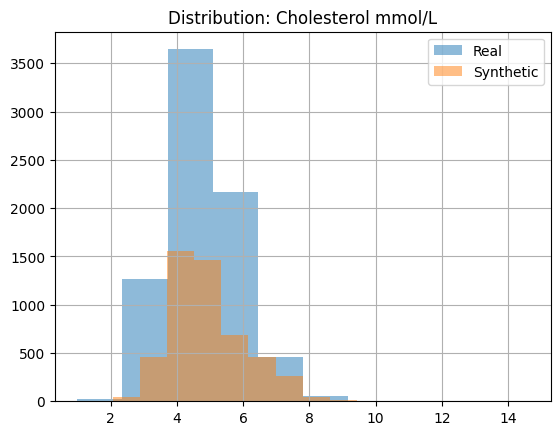

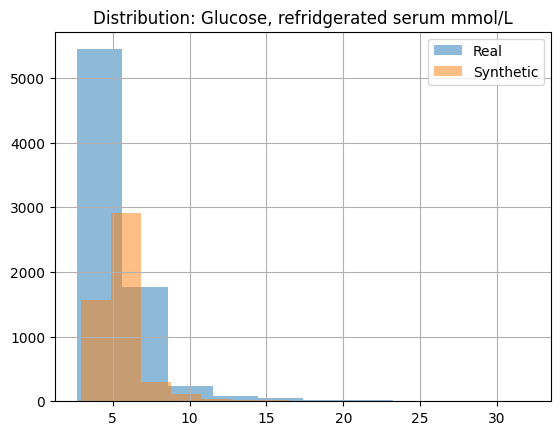

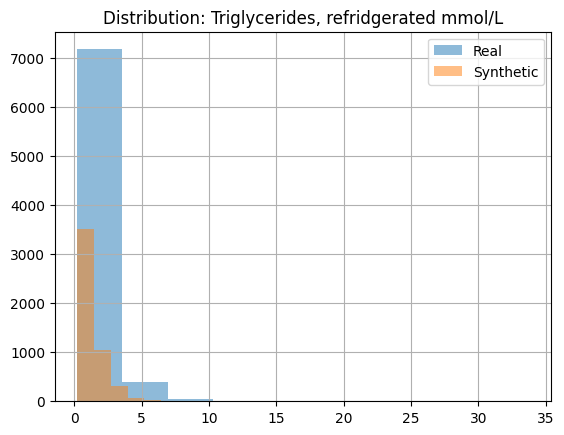

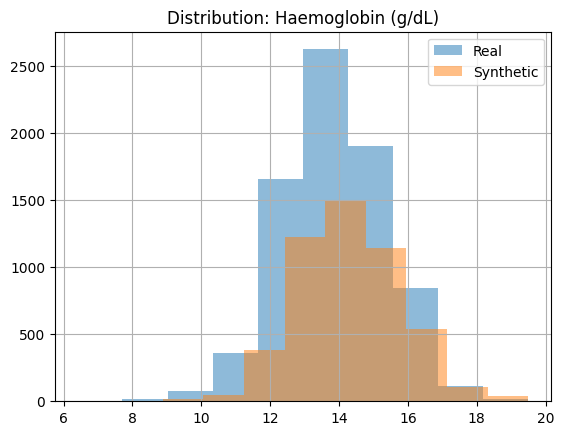

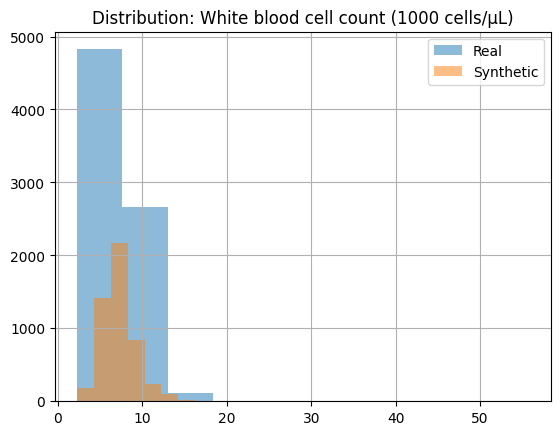

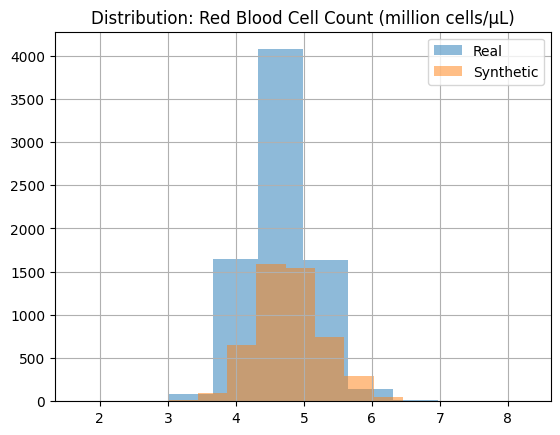

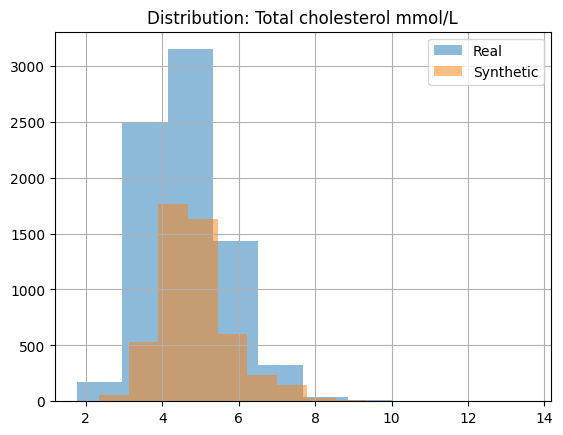

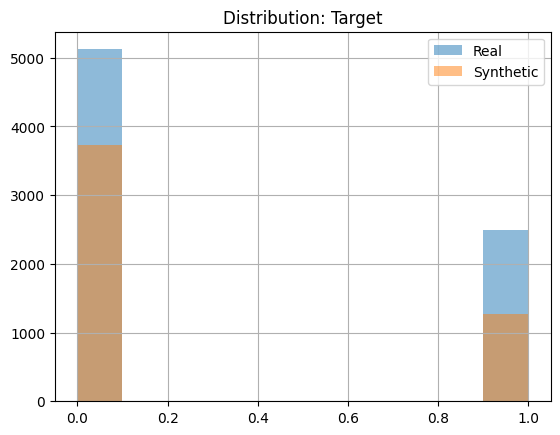

In [12]:
for feature in features:
    plt.figure()
    df_subset[feature].hist(alpha=0.5, label='Real')
    synthetic_data[feature].hist(alpha=0.5, label='Synthetic')
    plt.title(f'Distribution: {feature}')
    plt.legend()
    plt.show()


Test Predictive performance

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'Target' is your label column
X_real = df_subset.drop(columns=['Target'])
y_real = df_subset['Target']

X_syn = synthetic_data.drop(columns=['Target'])
y_syn = synthetic_data['Target']

# Train on synthetic
model = RandomForestClassifier()
model.fit(X_syn, y_syn)

# Predict on real
y_pred = model.predict(X_real)
acc = accuracy_score(y_real, y_pred)
print(f"Accuracy (Train on Synthetic, Test on Real): {acc:.4f}")


Accuracy (Train on Synthetic, Test on Real): 0.6752


saving synthetic data

In [14]:
synthetic_data.to_csv("synthetic_data_ctgan_5000.csv", index=False)


The CTGAN model was applied to generate synthetic medical lab data using selected numerical features. The Kolmogorov–Smirnov (KS) test results indicated a moderate similarity between the real and synthetic data distributions, with some variation across features—particularly in variables like Total Cholesterol and Haemoglobin.

Despite these differences, the synthetic data showed practical utility: a classifier trained on the synthetic data achieved 67.52% accuracy when tested on real data. This demonstrates CTGAN’s ability to capture meaningful patterns in the original dataset, though some limitations exist in modeling complex feature distributions.